<a href="https://colab.research.google.com/github/carlosaugustuz/machine_learning_specialist_DIO/blob/main/desafio%202%20-%20Image%20Grayscale/grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


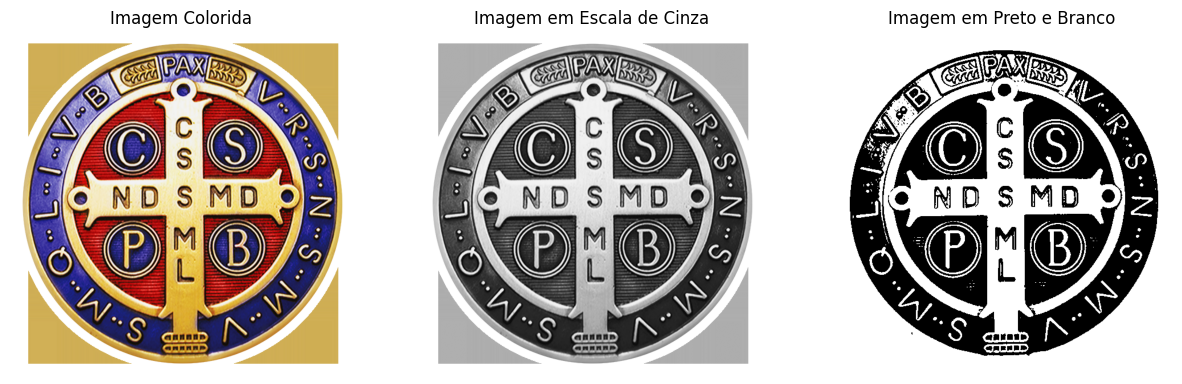

In [2]:
## Luminância é a medida do brilho percebido de uma cor, ou seja, o quanto uma cor contribui para o brilho geral da imagem.
## Para transformar uma imagem colorida em escala de cinza e preservar a sensação de brilho, usamos a fórmula da Luminância
from google.colab import drive
from PIL import Image # A biblioteca Pilow foi usada para carregar e iterar sobre os pixels da imagem
import matplotlib.pyplot as plt # A biblioteca matplotlib foi usada para exibir as imagens

drive.mount('/content/drive')

def luminancia(r, g, b):
    return int(0.299 * r + 0.587 * g + 0.114 * b) # Fórmula da luminância

def binarizar(img, limiar=128):
    # Binariza a imagem em preto e branco com base no limiar
    binarizada = Image.new("1", img.size)  # Cria a imamgem no modo "1" que é preto e branco
    for largura in range(img.width):  # Itera sobre a largura
        for altura in range(img.height):  # Itera sobre a altura
            pixel = img.getpixel((largura, altura))
            # Se o valor do pixel for maior ou igual ao limiar, pinta de branco (255), caso contrário, preto (0)
            binarizada.putpixel((largura, altura), 255 if pixel >= limiar else 0)
    return binarizada

def converte_escala_de_cinza(input_file):
    img = Image.open(input_file)  # Carrega a imagem
    img = img.convert("RGB")
    pixels = img.load()  # Obtém os pixels da imagem em uma matriz 2D -> largura x altura

    # Cria uma nova imagem para exibir a versão em escala de cinza
    escala_de_cinza = Image.new("L", img.size)  # "L" cria uma imagem de um único canal
    for largura in range(img.width): # itera sobre a largura da imagem RGB usando o range para limitar o tamanho
        for altura in range(img.height): # itera sobre a altura da imagem RGB usando o range para limitar o tamanho
            r, g, b = pixels[largura, altura] # insere nas váriáveis os valores rgb daquele pixel
            gray = luminancia(r, g, b) # aplica o cálculo da luminância no pixel
            escala_de_cinza.putpixel((largura, altura), gray)  # Salva o novo valor do pixel na imagem em escala de cinza

    binarizada = binarizar(escala_de_cinza) # Passa a imagem cinza para binarizar

    return img, escala_de_cinza, binarizada



# chama a função recebendo as imagens retornadas
imagem_colorida, imagem_cinza, imagem_binarizada = converte_escala_de_cinza('/content/drive/My Drive/medalha_sbento.png')

# Exibe a imagem colorida original
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagem_colorida)
plt.title("Imagem Colorida")
plt.axis("off")

# Exibe a imagem em escala de cinza
plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza, cmap="gray")
plt.title("Imagem em Escala de Cinza")
plt.axis("off")


# Exibe a imagem binarizada
plt.subplot(1, 3, 3)
plt.imshow(imagem_binarizada, cmap="gray")
plt.title("Imagem em Preto e Branco")
plt.axis("off")

plt.show()